In [4]:
from green_melon import coco_to_yolo_box

In [5]:
# coco.json gives us only label_id which starts from one-index. YOLO iz zero-index.
# From paper we can see that:  Sorghum samplings (Class 0), Grasses (Class 1), and Broad-leaf weeds (Class 2)
# I assume that in COCO its just + 1 so: Sorghum samplings (Class 1), Grasses (Class 2), and Broad-leaf weeds (Class 3)

TARGET_MAP = {
    "broadleaf": 0,
    "grass": 1,
}

# In our mapping, broadleaf is 0, and grass is 1.
# We have to map coco label id of grass which is 2 to our mapping in yolo of 1.
# We have to map coco label id of broadleaf which is 3 to our mapping in yolo of 0.\
COCO2YOLO_MAP = {
    1: 2,
    2: 1,
    3: 0,
}

In [6]:
coco_to_yolo_box(
    json_path="../dataset/labels/sorghum_coco/TrainSorghumWeed_coco.json",
    labels_mapping=COCO2YOLO_MAP,
    out="../dataset/labels/sorghum_yolo/",
)

In [7]:
coco_to_yolo_box(
    json_path="../dataset/labels/sorghum_coco/ValidateSorghumWeed_coco.json",
    labels_mapping=COCO2YOLO_MAP,
    out="../dataset/labels/sorghum_yolo/",
)

In [8]:
coco_to_yolo_box(
    json_path="../dataset/labels/sorghum_coco/TestSorghumWeed_coco.json",
    labels_mapping=COCO2YOLO_MAP,
    out="../dataset/labels/sorghum_yolo/",
)

In [9]:
from green_melon import plot_yolo_img

<Figure size 1800x1400 with 0 Axes>

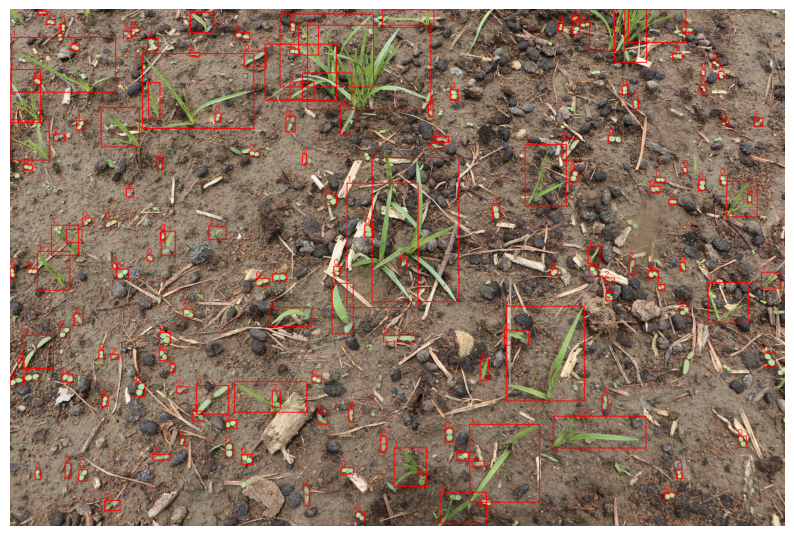

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14))

plot_yolo_img(
    img="../dataset/images/sorghum_weed/TrainSorghumWeed (15).JPG",
    txt="../dataset/labels/sorghum_yolo/TrainSorghumWeed (15).txt"
)

In [30]:
from pathlib import Path

LABELS_DIR = Path("../dataset/labels/sorghum_yolo")
SORGHUM_ID = 2

for label in LABELS_DIR.glob("*.txt"):
    
    bndboxes = [bndbox.strip() for bndbox in label.read_text().splitlines() if bndbox.strip()]
    keep_bndboxes = [bndbox for bndbox in bndboxes if int(bndbox.split()[0]) != SORGHUM_ID]
    label.write_text("\n".join(keep_bndboxes))

In [36]:
from pathlib import Path
from collections import Counter

LABELS_DIR = Path("../dataset/labels/sorghum_yolo")

empty_images = 0

bndbox_counter = Counter()
unique_label_counter = Counter()
images_per_label = Counter()
both_labels_count = 0

for label_file in LABELS_DIR.glob("*.txt"):

    bndboxes = [bndbox.strip() for bndbox in label_file.read_text().splitlines()]

    if not bndboxes:
        empty_images += 1
        print(label_file)
        continue

    labels_in_file = {int(bndbox.split()[0]) for bndbox in bndboxes}

    for lbl in labels_in_file:
        images_per_label[lbl] += 1

    if len(labels_in_file) == 1:
        unique_label = next(iter(labels_in_file))
        unique_label_counter[unique_label] += 1
    elif len(labels_in_file) == 2:
        both_labels_count += 1

    bndbox_counter.update([int(bndbox.split()[0]) for bndbox in bndboxes])

print("Images with a unique label (per label):", dict(unique_label_counter))
print("Images with both labels:", both_labels_count)
print("Overall image count per label:", dict(images_per_label))
print("Empty images:", empty_images)
print("Number of bndboxes per label:", dict(bndbox_counter))

../dataset/labels/sorghum_yolo/ValidateSorghumWeed (18).txt
../dataset/labels/sorghum_yolo/TestSorghumWeed (18).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (53).txt
../dataset/labels/sorghum_yolo/TestSorghumWeed (22).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (69).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (86).txt
../dataset/labels/sorghum_yolo/ValidateSorghumWeed (14).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (49).txt
../dataset/labels/sorghum_yolo/TestSorghumWeed (14).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (73).txt
../dataset/labels/sorghum_yolo/ValidateSorghumWeed (4).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (65).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (64).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (72).txt
../dataset/labels/sorghum_yolo/TrainSorghumWeed (151).txt
../dataset/labels/sorghum_yolo/TestSorghumWeed (15).txt
../dataset/labels/sorghum_yolo/ValidateSorghumWeed (15).txt
../dataset/labels/sorgh

In [37]:
empty_images

69

In [38]:
empty_images = []
for label_file in LABELS_DIR.glob("*.txt"):

    bndboxes = [bndbox.strip() for bndbox in label_file.read_text().splitlines()]

    if not bndboxes:
        empty_images.append(label_file.name)

In [42]:
with open("sorghum_weed_empty_images.txt", "w") as f:
    for label in empty_images:
        f.write(f"{label}\n")